# 体重データ分析

In [1]:
import pandas as pd
import datetime
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
def format_float(x):
    return round(x, 1)

In [3]:
WEIGHTS_PATH = "../data/all_weights.csv"
CALORIES_PATH = "../data/all_calories.csv"
HEALTHPLANETS_PATH = "../data/all_healthplanets.csv"
weights = pd.read_csv(WEIGHTS_PATH)
calories= pd.read_csv(CALORIES_PATH)
hps = pd.read_csv(HEALTHPLANETS_PATH)
len(weights), len(calories), len(hps)

(142, 83, 29)

In [4]:
def func(x):
    try:
        return datetime.datetime.strptime(x.date, '%Y-%m-%d').strftime('%Y-%m-%d')
    except Exception:
        return datetime.datetime.strptime(x.date, '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')

weights['date_index'] = weights.apply(func, axis=1)
calories['date_index'] = calories.apply(func, axis=1)
hps['date_index'] = hps.apply(func, axis=1)

weights['date_index'] = pd.to_datetime(weights.date_index)
calories['date_index'] = pd.to_datetime(calories.date_index)
hps['date_index'] = pd.to_datetime(hps.date_index)

weights = weights.set_index('date_index')
calories = calories.set_index('date_index')
hps = hps.set_index('date_index')

weights.index.name = 'date'
calories.index.name = 'date'
hps.index.name = 'date'

weights = weights.drop(['date'], axis=1)
calories = calories.drop(['date'], axis=1)
hps = hps.drop(['date'], axis=1)

In [5]:
weights = weights.groupby('date').mean()
hps = hps.groupby('date').mean()

In [6]:
df = pd.merge(weights, calories, how="outer", on="date")

hps = hps.drop(["weight"], axis=1)
df = pd.merge(df, hps, how="outer", on="date").sort_values('date')

len(df)

84

## データ分析

In [8]:
df["year"] = df.index.year
df["month"] = df.index.month
df["week_of_month"] = df.index.week
df["year_and_wom"] = df.index.strftime('%Y-W%W')

### 直近2週間

In [9]:
df_recent = pd.DataFrame()

In [10]:
df_recent["体重"] = format_float(df["weight"])
# df_recent["BMI"] = format_float(df["bmi"])
df_recent["体脂肪率"] = format_float(df['body_fat_parcentage'])
df_recent["内臓脂肪"] = format_float(df['visceral_fat_level'])
df_recent["筋肉量"] = format_float(df["muscle_mass"])
df_recent["消費カロリー"] = df["calory"]
df_recent["摂取カロリー"] = df["calory_in"]
df_recent["運動カロリー"] = df["calory_activity"]

In [11]:
df_recent.tail(14)

,体重,体脂肪率,内臓脂肪,筋肉量,消費カロリー,摂取カロリー,運動カロリー
date,,,,,,,
2020-02-10,94.2,NaN,NaN,NaN,4394.0,1963.0,3016.0
2020-02-11,93.6,NaN,NaN,NaN,4679.0,855.0,3327.0
2020-02-12,94.8,NaN,NaN,NaN,1862.0,711.0,0.0
2020-02-14,95.1,30.4,15.5,62.9,1707.0,172.0,0.0
2020-02-15,94.2,31.7,15.5,61.1,4393.0,1125.0,3013.0
2020-02-16,93.7,NaN,NaN,NaN,3489.0,1647.0,1882.0
2020-02-17,93.6,NaN,NaN,NaN,2241.0,968.0,376.0
2020-02-18,93.8,31.8,15.5,60.7,4182.0,1086.0,2764.0
2020-02-19,93.8,31.2,15.5,61.0,3045.0,1223.0,1336.0


### 週別の集計

In [12]:
groupby = df.groupby('year_and_wom')

In [13]:
df_by_week = pd.DataFrame()
df_by_week["体重"] = format_float(groupby["weight"].mean())
# df_by_week["BMI"] = format_float(groupby["bmi"].mean())
df_by_week["体脂肪率"] = format_float(groupby["body_fat_parcentage"].mean())
df_by_week["内臓脂肪"] = format_float(groupby['visceral_fat_level'].mean())
df_by_week["筋肉量"] = format_float(groupby["muscle_mass"].mean())

In [14]:
df_by_week["消費カロリー"] = format_float(groupby["calory"].mean()) * 7
df_by_week["摂取カロリー"] = format_float(groupby["calory_in"].mean()) * 7
df_by_week["カロリー増減"] = (format_float(groupby["calory_in"].mean()) - format_float(groupby["calory"].mean())) * 7
df_by_week["運動カロリー"] = format_float(groupby["calory_activity"].mean()) * 7

In [15]:
df_by_week["増減"] = df_by_week.diff()["体重"]
df_by_week["総減量"] = 106 - df_by_week["体重"]

In [16]:
df_by_week["週番号"] = df_by_week.index
df_by_week["date"] = df_by_week["週番号"].apply(lambda x: datetime.datetime.strptime(x + '-0', "%Y-W%W-%w"))
df_by_week.set_index("date", inplace=True)

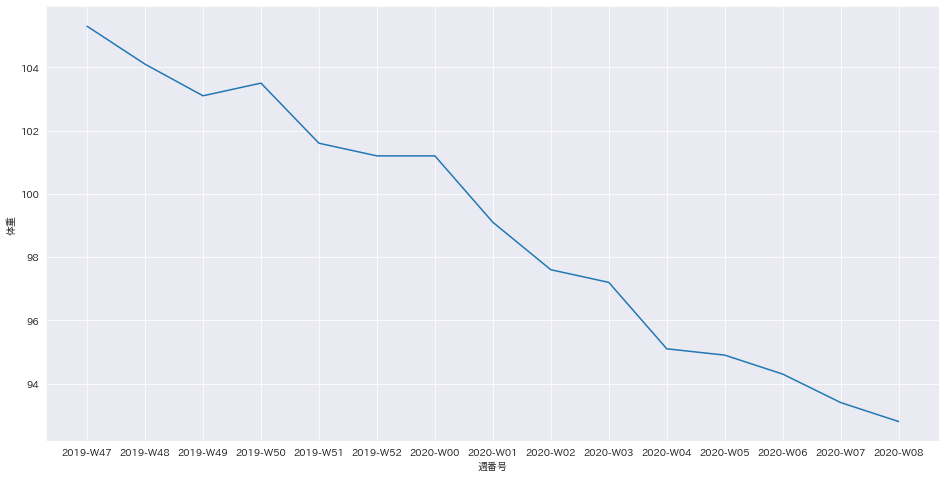

In [17]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=df_by_week, x='週番号', y='体重')

In [18]:
df_by_week.drop(["週番号"], axis=1, inplace=True)
df_by_week.index.name = '週別'

In [19]:
df_by_week = df_by_week.groupby("週別").mean()

In [29]:
df_by_week.tail(10)

,体重,体脂肪率,内臓脂肪,筋肉量,消費カロリー,摂取カロリー,カロリー増減,運動カロリー,増減,総減量
週別,,,,,,,,,,
2019-12-29,101.6,NaN,NaN,NaN,27458.90,0.0,-27458.90,15866.9,-1.9,4.4
2020-01-05,101.2,NaN,NaN,NaN,21579.25,0.0,-21579.25,9462.6,-0.2,4.8
2020-01-12,99.1,NaN,NaN,NaN,25256.00,1057.0,-24199.00,14153.3,-2.1,6.9
2020-01-19,97.6,NaN,NaN,NaN,28797.30,7693.0,-21104.30,18718.7,-1.5,8.4
2020-01-26,97.2,NaN,NaN,NaN,26156.90,8806.0,-17350.90,15303.4,-0.4,8.8
2020-02-02,95.1,31.9,15.6,61.2,26576.20,6472.2,-20104.00,15955.8,-2.1,10.9
2020-02-09,94.9,32.3,15.7,61.1,22120.00,7339.5,-14780.50,11114.6,-0.2,11.1
2020-02-16,94.3,31.0,15.5,62.0,23944.90,7551.6,-16393.30,13111.0,-0.6,11.7
2020-02-23,93.4,31.2,15.5,60.9,26669.30,7844.9,-18824.40,16081.1,-0.9,12.6


## バーンダウンチャート

In [21]:
planA = -0.9
planB = -0.6
planC = -1.2
start_weight = 105.3

In [22]:
bd_df = df_by_week[["体重", "増減"]].copy()

In [23]:
planA_weight = start_weight
planB_weight = start_weight
planC_weight = start_weight


for i, item in bd_df.iterrows():
    planA_weight = planA_weight + planA
    bd_df.loc[i, "planA"] = planA_weight
    
    planB_weight = planB_weight + planB
    bd_df.loc[i, "planB"] = planB_weight
    
    planC_weight = planC_weight + planC
    bd_df.loc[i, "planC"] = planC_weight
    
bd_df.rename(columns = {"体重": "実績"}, inplace=True)

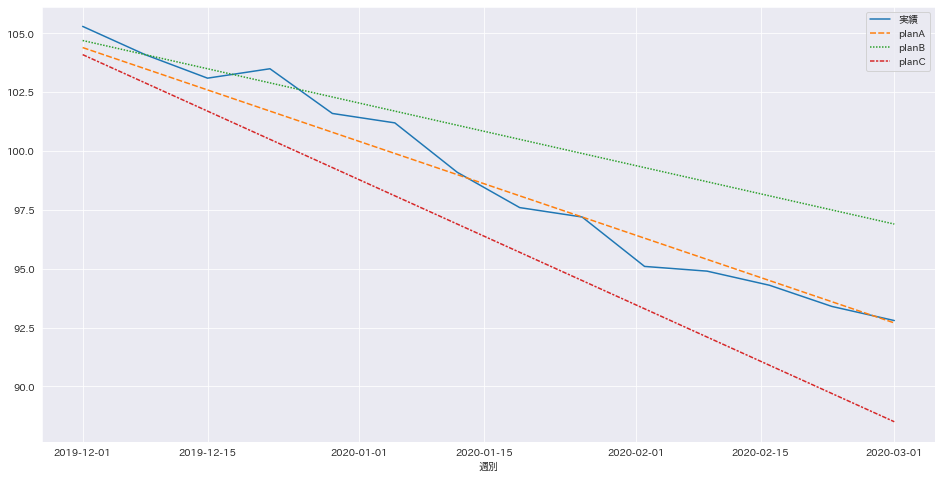

In [24]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(16,8))
sns.lineplot(data=bd_df.drop("増減", axis=1))

In [25]:
bd_df

,実績,増減,planA,planB,planC
週別,,,,,
2019-12-01,105.3,NaN,104.4,104.7,104.1
2019-12-08,104.1,-1.2,103.5,104.1,102.9
2019-12-15,103.1,-1.0,102.6,103.5,101.7
2019-12-22,103.5,0.4,101.7,102.9,100.5
2019-12-29,101.6,-1.9,100.8,102.3,99.3
2020-01-05,101.2,-0.2,99.9,101.7,98.1
2020-01-12,99.1,-2.1,99.0,101.1,96.9
2020-01-19,97.6,-1.5,98.1,100.5,95.7
2020-01-26,97.2,-0.4,97.2,99.9,94.5


## これからの体重予測

In [26]:
start_weight = round(weights.iloc[-1, 0], 1)

predict_df = pd.DataFrame()
index_date = datetime.datetime.today()

weightA = start_weight
weightB = start_weight
weightC = start_weight


for i in range(32):
    index_date += datetime.timedelta(days=7)
    weightA += planA
    weightB += planB
    weightC += planC
    index_f = index_date.strftime("%Y-%m-%d")
    predict_df.loc[index_f, "planA"] = weightA
    predict_df.loc[index_f, "planB"] = weightB
    predict_df.loc[index_f, "planC"] = weightC

In [27]:
predict_df

,planA,planB,planC
2020-03-03,91.9,92.2,91.6
2020-03-10,91.0,91.6,90.4
2020-03-17,90.1,91.0,89.2
2020-03-24,89.2,90.4,88.0
2020-03-31,88.3,89.8,86.8
2020-04-07,87.4,89.2,85.6
2020-04-14,86.5,88.6,84.4
2020-04-21,85.6,88.0,83.2
2020-04-28,84.7,87.4,82.0
2020-05-05,83.8,86.8,80.8
